# Documenting Pipeline Steps

# DATA PREP
If you just want to download and run the code in this assignment, you can generally ignore this phase, so long as you can access the pickle file and csv file described in 3a and 3b below.

## <span style="color: #C70039 ">1: Acquire and save PDFs

* Input(s): IFRC website
* Output(s): PDFs stored to disk

#### Narrative
Go to https://www.ifrc.org/evaluations and iterate through the pages. Find the links to the actual doc page, follow, then download the resource. Append the year of authorship to the front of the filename for organizational purposes and to facilitate time-based analysis later

#### Executable Code
utility_corpora_collector__download_ifrc_evaluations.ipynb

#### Key Technical Points
1) Standard python packages were used. BeautifulSoup to parse the html
2) Many files were in zips. I haven't dealt with those... downloaded but ignored
3) Many files were not in English despite being behind the 'English' URL. I haven't dealt with those



##  <span style="color: #C70039 ">2: Build Corpus - Parse PDFs and convert to Text format

* Input(s): PDFs stored to disk
* Output(s): Text files stored to disk

#### Narrative
Iterate over the files in directory, parse and output to text.

#### Executable Code
Can't find the full code right now, but the core functions to perform the scrubbing described herein can be found in text-inferences/src/common_functions/parse_pdf.py which I import into code that loops through the pdfs and writes the output to text files.
    
#### Key Technical Points
1) Many of the formating cues that help you understand the structure of a doc in PDF format disappear when read in by python. As such, parsing results in some inconsistent formatting and strange artifacts. For example, headers can randomly appear in the body of text, words can randomly by cut in half with a space in between them. Etc.
2) For the most part I didn't address any of those issues. The one that I did address was the inconsistency in newlines. Some documents used newlines in the way one would expect - at the end of sentences or paragraphs. Others would introduce them every 30-40 characters. When parsing there is a configurable parameter to distinguish between these two filetypes and in the latter case the code will remove the excess newlines. This is important for future parsing.

##  <span style="color: #C70039 ">3a: Pre-process Text - sentence by sentence
* Input(s): Text files stored to disk
* Output(s): pickle file of dataframe (eval_sents.pkl) split by doc and sentences, with each sentence tokenized

#### Narrative
Load up the text docs, load into NLP model (using Spacy), parse into sentences, tokenize and lemmatize each, generate a dataframe that is structured as shown in the figure below.

#### Figure: Initial DataFrame sample

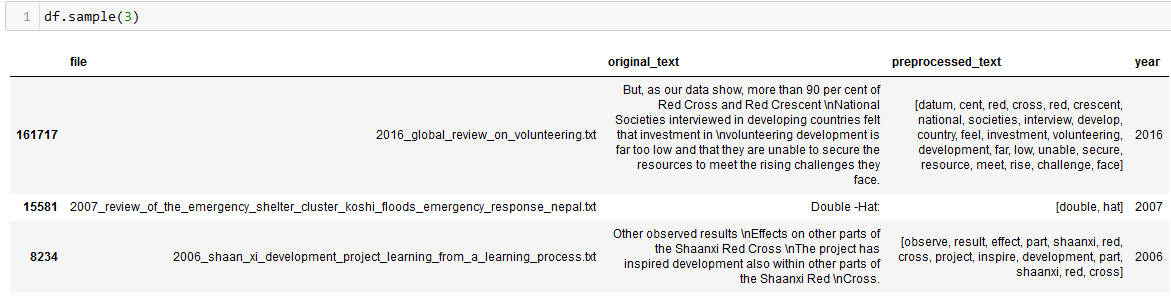

#### Executable Code

#### Key Technical Points
This process is somewhat computationally expensive. I don't remember exactly how long it takes but maybe 30 minutes. Most likely this can be made much faster with some attention paid to efficiency. However seeing that this process only has to run once I saw no need for that. The output of the pickle file captures the end-state of this process with no need to rerun unless the composition of the corpus increases.

## <span style="color: #C70039 ">3b: Pre-process Text - paragraph by paragraph
* Input(s): Text files stored to disk
* Output(s): pickle file of dataframe split by doc and sentences, with each sentence tokenized

#### Narrative
Load up the text docs. Perform some basic logic to split the doc into paragraphs, Generate a dataframe that is structured as shown in the figure below.




#### Figure: paragraph-level DataFrame. Note the lack of 'preprocessed_text' as is present in 3a
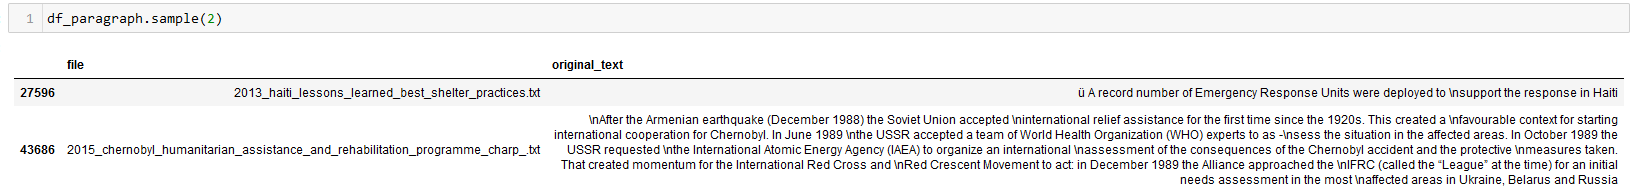

#### Executable Code

#### Key Technical Points
As with the PDF processing, there are two general patterns one can find in the text docs. One pattern is that paragraphs are separated by multiple newlines. This is the easiest to deal with. Another pattern is they are separated only by one newline. This is more difficult as it becomes difficult to distinguish between paragraph separation and just random newlines.
<br><br>
Both patterns can be present in the same file, so I perform a 2-step paragraph split:
1) Split on multiple newlines
2) Count the length of each paragraph. Where the length of a paragraph seems unnaturally long, I further split on sentence, then reconstruct paragraphs by recombining into 5-sentence blocks. Needless to say, this is not going to result in an actual reconstruction of natural paragraphs.
<br><br>
Note that this takes place in parallel to 3a. Neither process are dependent on each other.

## TODO/NOTES:
As you can see, there is a big difference in 3a and 3b in that I didn't perform the preprocessing step of tokenizing and lemmatizing the paragraphs. This is because as of now, when I perform the topic modelling I use a baked-in scikit-learn function to do this, thereby making the preprocessing_text field redundant. 
<br><br>
I don't know if this yields worse results or not. This is an area deserving of more exploration later.

## Location of files

evaluation files used for preprocessing: text-inferences/corpora/ifrc_evaluations/*
<br>
sentence-by-sentence file: text-inferences/src/assignments/202305_id_trends_in_ifrc_evals/file_intermediates/eval_sents.pkl
<br>
paragraph-by-paragraph file:  text-inferences/src/assignments/202305_id_trends_in_ifrc_evals/file_intermediates/evals_by_paragraph.csv

# ANALYSIS
The details of the analysis phase are documented in the individual analysis notebooks. This documentation will serve mainly to direct you to the right notebook

##  <span style="color: #C70039 ">Topic Modeling - Full Corpus at File, Paragraph, and Sentence-level Granularities.
* Input(s): evals_by_paragraph.csv and eval_sents.pkl
* Output(s): UI Output... can be saved if desired.

#### Narrative
This notebook is structured around the idea of exploration of the evaluations where you don't come to it with a preconceived notion of what's in there. It starts by performing topic modelling at the corpus/file level to get a feel for the dominant topics file by file, then paragraph across all docs. You'll see very distinctive differences with these two approaches, both are useful for getting a basic idea of the content of the corpus

#### Executable Code

#### Key Technical Points
For simplicity I only identify the most dominant topic, but particularly at the file level it may make sense to look at the top n topics... either as a fixed number (Top 3) or as a percentage (Top 50%)

##  <span style="color: #C70039 ">X
* Input(s): X
* Output(s): X

#### Narrative
X

#### Executable Code

#### Key Technical Points